# TD : Modèles et apprentissage en Machine Learning 

L'objectif de cette séance pratique et de regarder comment implémenter les différents modèles présentés lors des différentes séances à l'aide de Python.

Nous commencerons notre travail sur des jeux de données synthétiques afin de visualiser les résultats des différents modèles, puis on étudiera l'impact des hyper-paramètres sur les performances du modèles.

Dans un second temps, on cherchera à optimiser ces hyper-paramètres en mettant en place a cross-validation de ces derniers puis nous finirons par développer un protocole expérimental complet d'apprentissage et de comparaison des modèles.

Nous étudierons ensuite les arbres de décision et 

# I. Visualisation des sorties d'un modèle de SVM : linéaire et non linéaire

On commence par regarder le comportement d'un SVM mais aussi la façon d'apprendre ce dernier. Pour cela, nous aurons besoin des librairies suivantes de Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

On commence par charger notre jeu de données. On travaillera avec un jeu de données classique **iris**.
Ce jeu de données est un jeu de données multi-classes.

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] # On va garder uniquement les deux premières variables
y = iris.target

## A. Apprentissage d'un SVM linéaire

L'apprentissage d'un SVM se fait avec la fonction SVC qui dépend de plusieurs paramètres dont le "noyau" que l'on souhaite employer. Ici, on souhaite travailler avec un noyau linéaire dans un premier temps.

Pour apprendre un modèle de SVM, on utilisera la commande suivante 

In [3]:
clf_linear = SVC(kernel = "linear")
clf_linear.fit(X,y)

SVC(kernel='linear')

On va maintenant chercher à représenter graphiquement les sorties du modèle et on regardera ensuite la performance de ce dernier à l'aide de différentes librairies sklearn.

In [4]:
# On va créer un maillage de notre espace de représentation des données
h = 0.01  # finesse du maillage
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

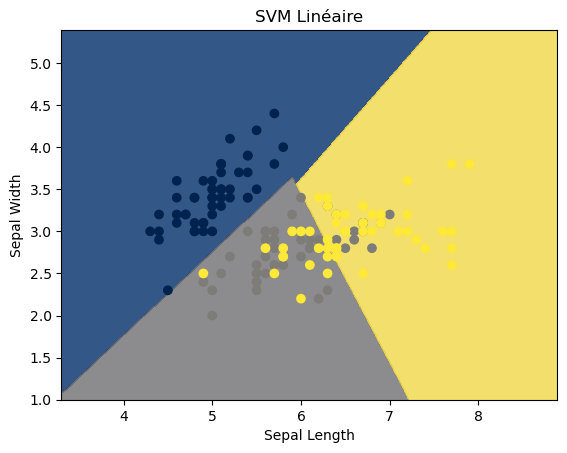

In [5]:
# On représente maintenant les frontières de décision 

Z_linear = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.cividis, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cividis)
plt.title('SVM Linéaire')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

On pourra également regarder les performances du modèle en étudiant sa matrice de confusion et calculer différentes métriques de performance.

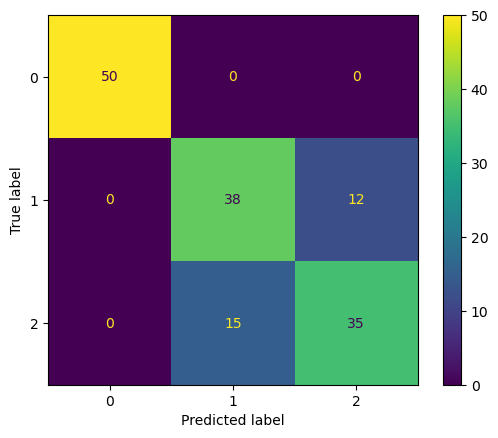

In [6]:
# On commence par regarder les prédictions effectuées par notre modèle sur les données.

prediction = clf_linear.predict(X)

# On peut maintenant regarder la matrice de confusion de notre matrice et en faire une représentation graphique

confusion_pred = confusion_matrix(y, prediction) # Mettre les arguments dans l'ordre (true_label, predicted_label)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_pred,
                              display_labels=clf_linear.classes_)
disp.plot()
plt.show()



In [7]:
# Calcul de l'accuracy

accuracy_score(y,prediction)

0.82

$$ $$

**Question 1 :** Refaire le même procédé avec le jeu de données généré par le code ci-dessous

$$ $$

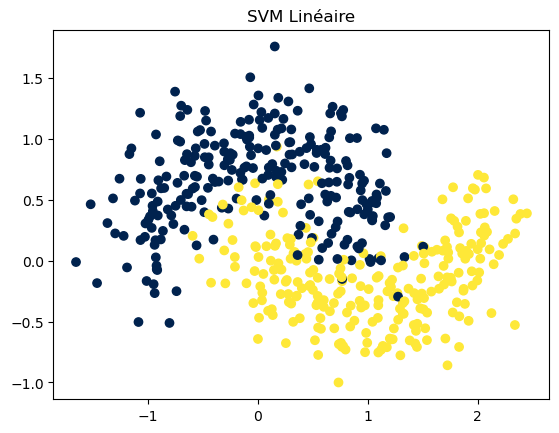

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.25, random_state=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cividis)
plt.title('SVM Linéaire')
plt.show()

Pour le moment, nous n'avons regarder qu'un problème particulier du SVM.

$$ $$

**Question 2** : Rappeler le problème d'optimisation du SVM ainsi que la signification de l'hyperparamètre associé au problème.

$$ $$

On va maintenant chercher à regarder l'influence de cet hyperparamètre sur les performances du modèle sur notre jeu de données mais aussi l'impact que cela peut avoir sur la frontière de décision. On commence donc par se donner une grille de valeurs de l'hyperparamètre C afin d'étudier son impact.

In [9]:
X = iris.data[:, :2] # On va garder uniquement les deux premières variables
y = iris.target

C_values = [0.001,0.1 , 100]

On va maitenant regarder graphiquement et empiriquement l'influence de cet hyper-paramètre C

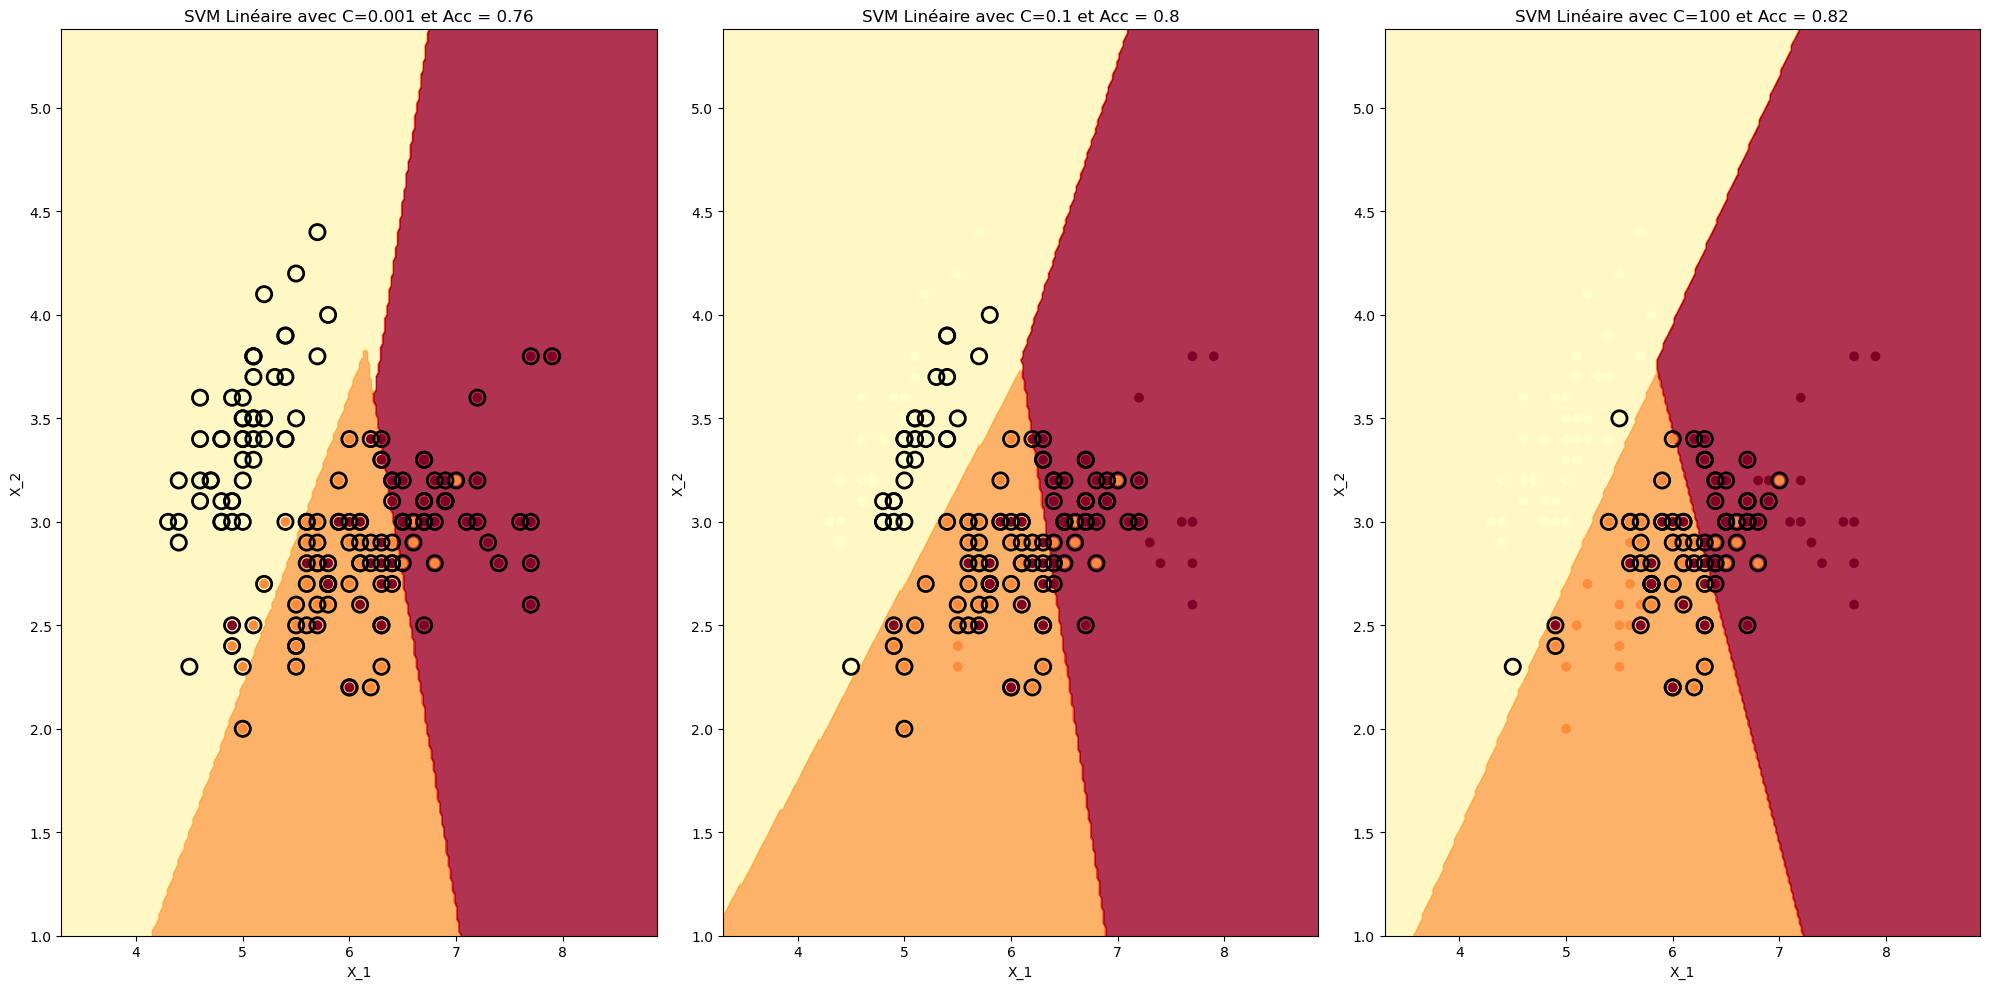

In [10]:
plt.figure(figsize=(20, 10))
for i, C in enumerate(C_values, 1):
    # Apprentissage du modèle et évaluation des performances
    
    clf_lin = SVC(kernel='linear', C = C)
    clf_lin.fit(X, y)

    prediction = clf_lin.predict(X)
    acc_lin = accuracy_score(y,prediction)

    # On va créer à nouveau notre même fenêtre graphique
    h = 0.02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot decision boundary
    plt.subplot(1, 3, i)
    Z_lin = clf_lin.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_lin = Z_lin.reshape(xx.shape)
    plt.contourf(xx, yy, Z_lin, cmap=plt.cm.YlOrRd, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.YlOrRd)

    # Ajout des points supports
    plt.scatter(clf_lin.support_vectors_[:, 0],
                clf_lin.support_vectors_[:, 1],
                s=120, facecolors='none', edgecolors='black', linewidths=2,
                label='Support Vectors')
    
    plt.title(f'SVM Linéaire avec C={C} et Acc = {acc_lin}')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

$$ $$

**Question 3**: Rappeler la définition d'un point support de modèle de SVM et mettre en évidence ces derniers sur le jeu de données précédent.

$$ $$

**Question 4**: Faire le lien entre l'hyperparamètre C et le nombre de points supports du modèle. Est-ce une bonne chose un nombre important 
de points supports ? Quels sont les avantages/inconvénients d'avoir de petites ou grandes valeurs de C ?

$$ $$

## B. Apprentissage d'un SVM Gaussien (Noyau RBF)

Pour le moment, nous nous sommes uniquement intéressé au problème du SVM linéaire dont la formulation a été rappelée dans la deuxième question. On va maintenant reprendre notre jeu de données des lunes et on peut remarquer que ce dernier est difficilement linéaire séparable.
Il est donc nécessaire d'employer des approches plus complexes basées sur les méthodes à noyaux. Le noyau le plus couramment utilisé est le noyau gaussien défini par :
$$ $$

$$\forall x,x' \in\mathbb{R}^d, \quad k(x,x') = \exp(-\gamma \Vert x-x' \Vert^2_2).$$

Dans ce cas là, nous avons un nouvel hyperparamètre à optimiser qui est l'hyperparamètre $gamma$. 

$$ $$

**Question 5**: Obsever graphiquement l'influence de cet hyperparamètre $\gamma$ sur la frontière de décision de votre modèle et sur les performances de ce dernier en fixant la valeur de $C$ à $1$.

$$ $$

**Question 6**: A nouveau, regarder comment évolue le nombre de points supports en fonction de la valeur de $\gamma$.

$$ $$

# II. Apprentissage d'un modèle et cross-validation des hyper-paramètres

On souhaite maintenant regarder comment cross-valider les hyper-paramètres liés à ces deux modèles afin de pouvoir comparer leur performances et de déterminer le modèle le plus approprié sur un jeu de données. La première étape consiste à créer nos jeux de données Train et Test.

In [11]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import load_breast_cancer

$$ $$

**Question 1**: Télécharger le jeu de données breast_cancer et séparer votre jeu de données en deux ensembles train et test. On prendra soin de conserver 75% des données pour l'entraînement.

$$ $$

On considère, pour simplifier notre modèle de SVM linéaire pour lequel on cherche à optimiser l'hyperparamètre $C$. 
Pour cela, nous devons créer différents folds à partir de notre ensemble d'entraînement afin de faire la cross-validation de notre modèle.

$$ $$

**Question 2**: Donnez vous une liste de valeurs de $C$ et créer vos différents groupes d'apprentissage et de validation qui vous permettront de déterminer la meilleur valeur de l'hyperparamètre. On pensera à utiliser la fonction *StratifiedKFold*

$$ $$

**Question 3**: Ecrire une boucle permettant de trouver le meilleur hyperparamètre pour votre problème de classification. Attention, rappelez-vous, il vous faudra penser à normaliser les données à chaque itération de la cross-validation. Il faudra ensuite extraire le mielleur hyperparamètre après la cross-validation.

$$ $$

**Question 4**: Finir votre procédure et evaluer les performances de votre modèle sur l'ensemble test. Est-ce que cela vous a permis d'apprendre le meilleur modèle, *i.e.* est-ce que vous avez retenu la valeur de $C$ qui permet d'optimiser le score sur l'ensemble test ?

$$ $$


$$ $$

Il y bien sûr des moyens beaucoup plus rapides pour faire de la Cross-Validation à l'aide du processus présenté ci-dessous

$$ $$

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(iris.data, iris.target)
print(clf.best_score_)
print(clf.best_params_)

NameError: name 'svm' is not defined

$$ $$

**Question 5**: Essayez maintenant d'écrire un code complet qui vous permettra de comparer les performances d'un SVM Linéaire et d'un SVM Gaussien sur ce jeux de données.
  
$$ $$

**Question 6**: Appliquer la même procédure mais sur un ensemble de jeux de données.
  
$$ $$

# III. Régression Logistique

# IV. Arbres de décisions

Dans cette partie, on va étudier le comportement des arbres de décisions dans le cadre d'un problème de classification et d'un problème de régression. On cherchera à mettre en évidence le rôle des différents hyper-paramètres et leur impact mais aussi comment évaluer l'importance de chaque variable dans la prise de décision.




In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_regression, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.inspection import permutation_importance
import seaborn as sns

sns.set(style="whitegrid")

## A. Classification sur un jeu de données simulées

On va travailler sur le jeu de données classique des lunes.

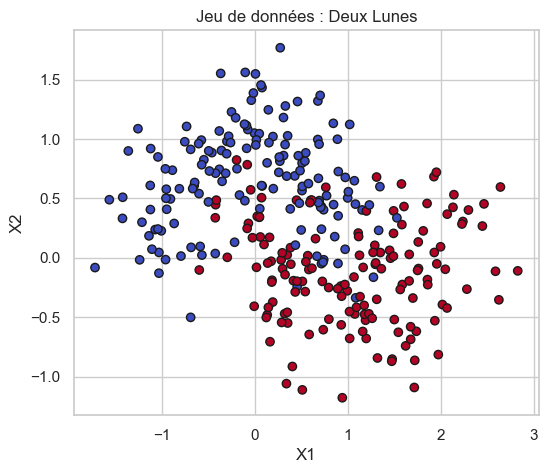

In [15]:
X, y = make_moons(noise=0.3, random_state=42, n_samples=300)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Jeu de données : Deux Lunes")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

$$  $$

**Question 1** : Exécuter le code ci-dessous et détermienr les performances de l'arbre. Que pouvez dire de la profondeur de l'arbre au regard des performances obtenues ?

$$  $$

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

print("Accuracy sur le test :", accuracy_score(y_test, clf.predict(X_test)))

Accuracy sur le test : 0.8555555555555555


$$ $$

**Question 2** : Affichez l'arbre de décision avec la commande  "plot_tree(clf, filled=True)" et commentez la structure.

$$ $$

On peut également représenter la frontière de décision de notre arbre de décision avec le code ci-dessous

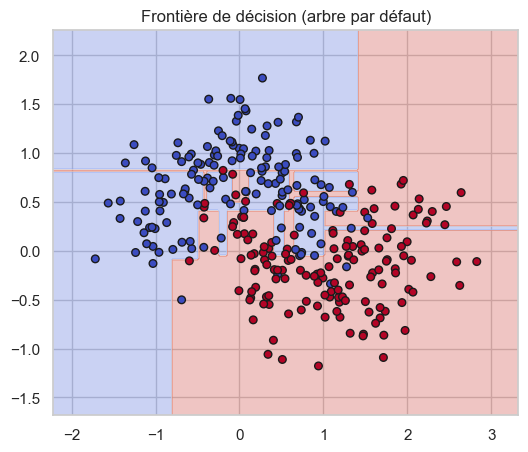

In [17]:
def plot_decision_boundary(model, X, y, ax=None, title=None):
    if ax is None:
        ax = plt.gca()
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=30)
    if title:
        ax.set_title(title)

# Exemple : 
fig, ax = plt.subplots(figsize=(6,5))
plot_decision_boundary(clf, X, y, ax, "Frontière de décision (arbre par défaut)")
plt.show()

$$ $$

**Question 3** : Observer les frontières de décisions obtenues. Est-ce que cela valide l'hypothèse formulée à la question 1.

$$ $$

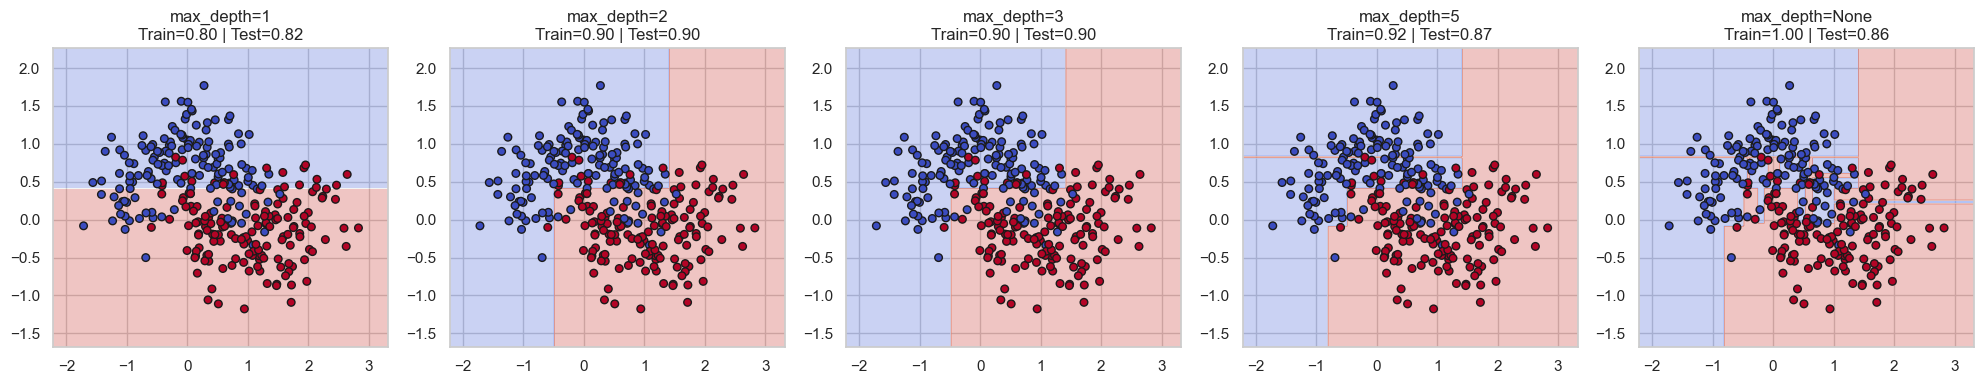

In [18]:
depth_values = [1, 2, 3, 5, None]

fig, axes = plt.subplots(1, len(depth_values), figsize=(20, 4))

for ax, d in zip(axes, depth_values):
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    # Calcul des performances
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    # Titre avec les scores
    title = f"max_depth={d}\nTrain={train_acc:.2f} | Test={test_acc:.2f}"
    
    plot_decision_boundary(model, X, y, ax, title=title)

plt.tight_layout()
plt.show()

$$ $$

**Question 4** : Que remarquez-vous sur les scores train et test quand la profondeur augmente ?

$$ $$

**Question 5** : Quelle est la structure optimale, en terme de profondeur d'après les résultats obtenus ?

$$ $$

**Question 6** : Pourquoi l’arbre avec max_depth=None a-t-il souvent une très bonne performance sur le train mais une mauvaise sur le test ?

$$ $$

On cherche maitenant à étudier l'influence des autres hyper-paramètres sur les performances du modèles. Plus précisément on cherche à étudier les effets des hyper-paramètres :


* min_samples_split : nombre minimal d’échantillons pour diviser un nœud
* min_samples_leaf  : nombre minimal d’échantillons par feuille

Pour cela, on utilisera le code ci-dessous et fixera la profondeur de l'arbre à $5$.
 
 

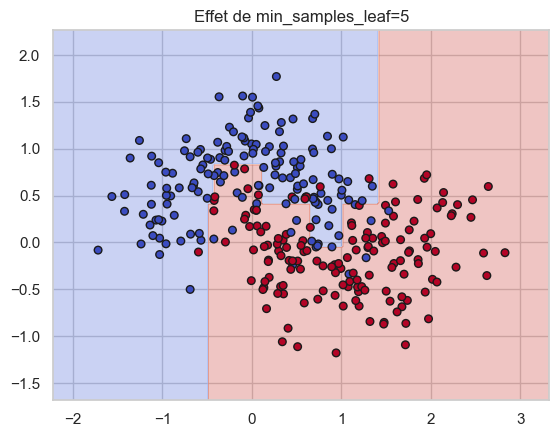

In [19]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X, y, title="Effet de min_samples_leaf=5")

$$ $$

**Question 7** : On utilisera le code précédent pour illustrer l'impact de ces deux hyper-paramètres et étudier leur effet.

$$ $$

**Question 8** : Comparez les frontières avec min_samples_leaf=1 et min_samples_leaf=10.

$$ $$

**Question 9** : Quelle est l’influence de min_samples_split ?

$$ $$





## B. Arbres de régression

On cherche maitenant à illustrer le fonctionnement d'un arbre de régression. 
Pour cela, on va considérer le jeu de données ci-dessous, qui se présente sous la forme d'une sinusoïde et, dans la suite, on s'intéressera uniquemeet au paramètre qui gère la profondeur de l'arbre.

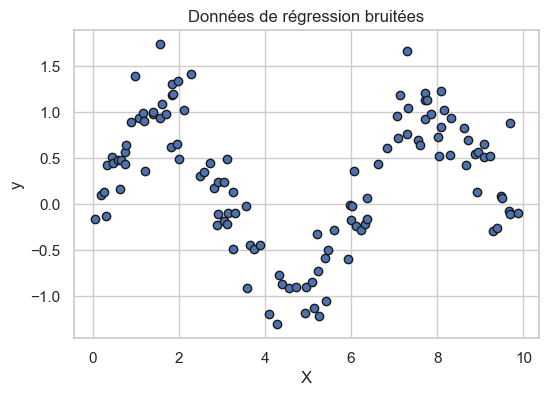

In [20]:
rng = np.random.RandomState(42)
X = np.sort(10 * rng.rand(120, 1), axis=0)
y = np.sin(X).ravel() + 0.3 * rng.randn(120)

plt.figure(figsize=(6,4))
plt.scatter(X, y, edgecolor='k')
plt.title("Données de régression bruitées")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

On va utiliser le code ci-dessous pour étudier l'impact de la profondeur de l'arbre sur les performances du modèle

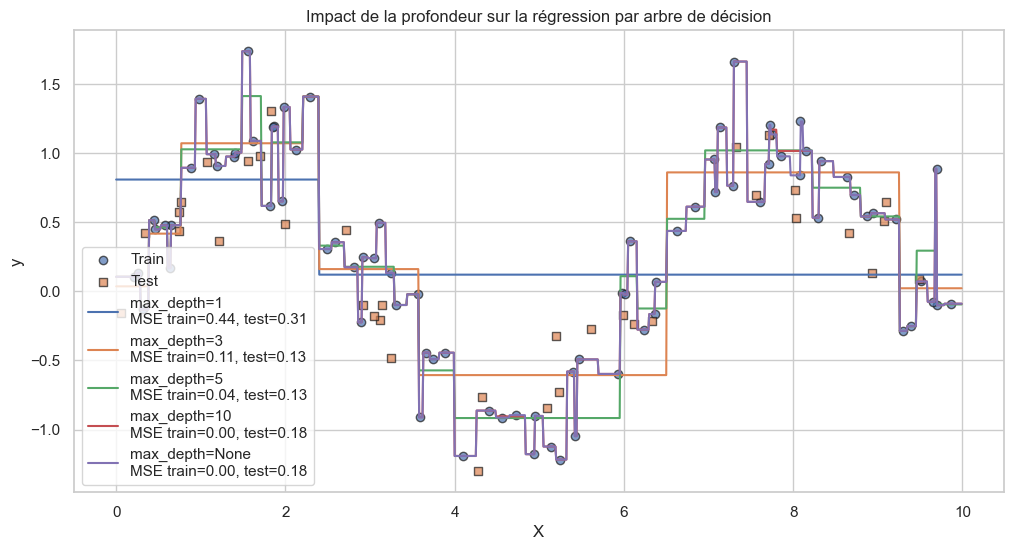

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = [1, 3, 5, 10, None]
X_plot = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]

plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, edgecolor='k', label="Train", alpha=0.7)
plt.scatter(X_test, y_test, edgecolor='k', label="Test", alpha=0.7, marker='s')

for d in depths:
    reg = DecisionTreeRegressor(max_depth=d, random_state=42)
    reg.fit(X_train, y_train)
    
    # Prédictions
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    y_pred_plot = reg.predict(X_plot)
    
    # Calcul des erreurs
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Affichage du modèle et des scores
    plt.plot(X_plot, y_pred_plot, label=f"max_depth={d}\nMSE train={mse_train:.2f}, test={mse_test:.2f}")

plt.legend()
plt.title("Impact de la profondeur sur la régression par arbre de décision")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

$$ $$

**Question 1** : Que remarquez-vous sur l’évolution des erreurs MSE_train et MSE_test lorsque max_depth augmente ? 

$$ $$

**Question 2** : Quelle profondeur semble la plus adaptée au compromis biais/variance ?

$$ $$

**Question 3** : Que se passe-t-il si on laisse max_depth=None (arbre non limité) ?

$$ $$

## C. Importance des variables

Dans cette dernière partie, on va chercher à étudier l'importance des différentes variables dans la prise de décision sur un problème de classification. Pour cela, on va considérer le jeu de données *Breast Cancer* et entrainer un arbre de classification.

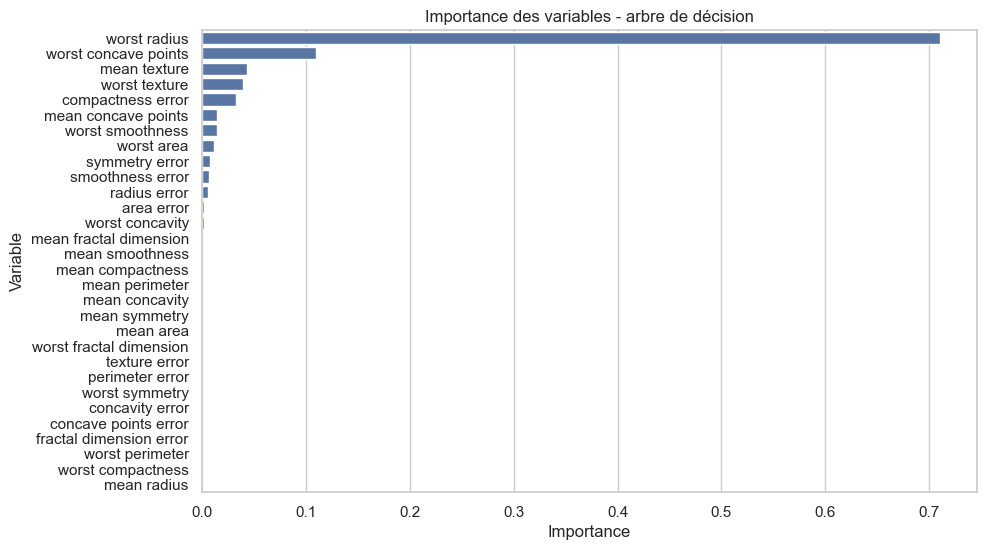

In [37]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X, y)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Importance des variables - arbre de décision")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()

$$ $$

**Question 1** : Quelles variables sont les plus importantes pour la classification ?

$$ $$

**Question 2** : Que se passe-t-il si on augmente max_depth ?

$$ $$

Les arbres sont des modèles importants car ces derniers sont explicables. 
En effet, on est capable grâce à la succession de règles de comprendre le cheminement qui a mené à la prise de décision, *i.e.*, à la la classification d'un exemple. 
De plus, nous sommes capables de déterminer quelles sont les variables clefs pour la prise de décision, ce qui peut être intéressant lorsque l'on cherche à limiter le nombre d'informations sur lesquelles doit se baser notre décision. 

# V. Méthodes ensemblistes

Les méthodes ensemblistes sont des méthodes qui consistent à combiner plusieurs modèles afin de pouvoir générer un nouveau modèle qui soit potentiellement plus *performant* mais aussi plus *robuste*.
Cette combinaison s'effectue généralement de deux façons :

* via du **bagging**
* ou du **boosting**

La première approche, *i.e.*, le bagging, va permettre de réduire la *variance*, rendant ainsi le modèle plus robuste tout en préservant ses performances. La deuxième approche, *i.e.*, le boosting, va permettre d'agir réduire la composante de l'erreur que l'on appelle le biais, rendant les modèles plus performant tout en préservant leur robustesse.

Nous pourrions également étudier une autre approche ensembliste que l'on appelle le **stacking**.
Si dans les approches de type bagging et boosting, nous combinons ensemble, plusieurs modèles de la même nature, *i.e.*, plusieurs SVM ou plusieurs arbres de faibles profondeurs, le stacking consiste à combiner plusieurs modèles mais de natures différentes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_regression, make_moons
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import seaborn as sns

sns.set(style="whitegrid")

## A. Bagging : réduction de la variance

Un algorithme emblématique reposant du bagging est celui des forêts aléatoires. 
En quelques mots, les méthodes de bagging consistent à combiner des modèles qui sont appris à partir d'informations différentes, *i.e.* à partir d'échantillons différents.
Ces modèles sont ensuite combinés, généralement sommés, afin de créer un seul et uniquement modèle performant.


On considère un échantillon d'apprentissage $S$ et on effectue la procédure suivante $T$ fois, où $T$ représente le nombre de modèles que l'on souhaite apprendre : (i) on tire un échantillon $S_t$ avec remise à partir de $S$, (ii) on apprend un modèle $h_t$ en en utilisant l'échantillon $S_t$.

Une fois que les $T$ modèles sont appris, on se retrouve avec un modèle global $H_T$ que l'on écrira :

$$ H_T = \dfrac{1}{T}\sum_{t=1}^T h_t. $$

L'exemple le plus simple est celui de la combinaisons d'arbres pour construire une *forêt aléatoire* [Breiman, 2001].

Avant de combiner les modèles, on va faire un rapide retour sur les arbres de décisions et on cherchera par la suite à combiner des modèles. 
On considère le jeu de données ci-dessous.

In [ ]:
# Données sinusoïdales
rng = np.random.RandomState(42)
X = np.sort(10 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel() + 0.4 * rng.randn(200)
y_true = np.sin(np.linspace(0, 10, 500).reshape(-1, 1)).ravel()  # vraie fonction

# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_plot = np.linspace(0, 10, 500).reshape(-1, 1)
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, label="Train", color="blue", alpha=0.6)
plt.scatter(X_test, y_test, label="Test", color="red", alpha=0.6)
plt.plot(X_plot, y_true, color="green", linewidth=2, label="Fonction sin(x)")
plt.legend()
plt.title("Jeu de données sinusoïdal bruité")
plt.show()


On va maitenanant regarder les prédictions effectuées par un arbre de régression de profondeur 10. 
Notons que l'on pourrait aussi faire cela avec n'importe quel autre modèle comme un SVR ou une régression linéaire polynomiale d'un degré elevé si on le souhaite.

In [ ]:
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

X_plot = np.linspace(0, 10, 500).reshape(-1, 1)
y_plot = tree.predict(X_plot)

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, label="Train", color="blue", alpha=0.5)
plt.plot(X_plot, y_true, color="green", linewidth=2, label="Fonction sin(x)")
plt.plot(X_plot, y_plot, label=f"Arbre seul\nMSE train={mse_train:.2f} / test={mse_test:.2f}", color="black")
plt.legend()
plt.title("Prédiction d'un arbre de régression seul")
plt.show()


$$ $$

**Question 1** : Comparer la fonction de prédiction à la vraie valeur, que constatez-vous ?

$$ $$

**Question 2** : Que se passe-t'il si l'on augmente la profondeur de l'arbre ? Quelle erreur change le plus (train ou test) lorsque la complexité augmente ?

$$ $$

On va maintenant s'intéresser à la méthode de bagging dont une implémentation directe est proposée et illustrée ci-dessous.

In [ ]:
# Bagging avec plusieurs arbres
bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=10),
    n_estimators=10,
    random_state=42,
    bootstrap=True
)
bagging.fit(X_train, y_train)

# Prédictions
y_pred_train = bagging.predict(X_train)
y_pred_test = bagging.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Affichage
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color="blue", alpha=0.5, label="Train")
plt.scatter(X_test, y_test, color="red", alpha=0.5, label="Test")
plt.plot(X_plot, y_true, color="green", linewidth=2, label="Fonction sin(x)")
plt.plot(X_plot, bagging.predict(X_plot), color="black",
         label=f"Bagging (50 arbres)\nMSE train={mse_train:.2f} / test={mse_test:.2f}")
plt.legend()
plt.title("Réduction de variance par Bagging")
plt.show()


$$ $$

**Question 3** : Comparez les MSE entre l’arbre seul et le bagging.

$$ $$

**Question 4** : Quelle est la différence majeure que vous observez dans la courbe de prédiction ?

$$ $$

**Question 5** : Expliquez pourquoi le bagging réduit la variance du modèle. Pour cela on va comparer l'erreur de la méthode ensembliste à la moyenne des erreurs des predicteurs individuels.

$$ $$

On souhaite maintentant comparer le comportement de différents arbres appris sur les échantillons bootstrap et notre régresseur obtenu par méthode de bagging. 
On va donc créer différents échantillons Bootstrap comme cela a été expliqué en début de section. 
Pour rappel, un échantillon Bootstrap $S_b$  est un échantillon de même taille que l'échantillon $S$ obtenu par tirage avec remise d'exemples de l'échantillon $S$.

In [ ]:
from sklearn.utils import resample

plt.figure(figsize=(8,5))

predictions = []

for i in range(10):
    # Tirage bootstrap
    X_boot, y_boot = resample(X, y, replace=True, random_state=i)
    
    # Apprentissage d’un arbre sur cet échantillon
    tree = DecisionTreeRegressor(max_depth=10)
    tree.fit(X_boot, y_boot)
    
    # Prédictions sur la grille
    y_pred = tree.predict(X_plot)
    predictions.append(y_pred)
    
    # On affiche chaque prédiction d’arbre en transparence
    plt.plot(X_plot, y_pred, color="gray", alpha=0.3)

#plt.plot(X_plot, bagging.predict(X_plot), color="red", linewidth=2, label="Bagging (moyenne)")
y_mean = np.mean(predictions, axis=0)
plt.plot(X_plot, y_mean, color="black", linewidth=2, label="Moyenne des arbres (Bagging)")
plt.plot(X_plot, y_true, color="green", linewidth=2, label="Fonction sin(x)")
plt.title("Superposition de plusieurs arbres vs moyenne (Bagging)")
plt.legend()
plt.show()

$$ $$

**Question 6** : Que remarquez-vous sur les courbes grises représentant les prédictions des arbres individuels ?

$$ $$

**Question 7** : Pourquoi ces arbres sont-ils différents les uns des autres ?

$$ $$

**Question 8** : En quoi la moyenne des arbres (courbe représentée en noire) est-elle plus stable ?

$$ $$

**Question 9** : Comment cette moyenne illustre-t-elle la réduction de variance apportée par le bagging ? 

$$ $$

**Question 10** : Essayez de modifier n_estimators et max_depth et regarder comment cela impact la stabilité du modèle final ?

$$ $$

On souhaite maintenant comparer les performances d'un arbre à celle d'une forêt aléatoire pour un problème de classification

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.4, random_state=42, n_samples=300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

acc_tree = accuracy_score(y_test, tree.predict(X_test))
acc_forest = accuracy_score(y_test, forest.predict(X_test))

print(f"Accuracy arbre : {acc_tree:.3f}")
print(f"Accuracy forêt : {acc_forest:.3f}")


$$ $$

**Question 11** : Quelle différence de performance observez-vous ?

$$ $$

**Question 12** : Pourquoi la forêt aléatoire est-elle plus robuste ?

$$ $$

**Question 13** : Que se passe-t-il si on réduit n_estimators ?

$$ $$



Dans une dernière partie, on souhaite étudier ce que l'on appelle l'erreur OOB (*Out of Bag*) qui est l'erreur utiilisée pour effectuer la cross-validation des modèles de forêt aléatoire. 

Note à moi même : regarder comment mettre ce concept en avant ...

In [ ]:
## A méditer 

## B. Boosting : réduction du biais

Si précédemment les modèles ont été appris les uns indépendamment des autres, l'idée du boosting est de rompre cette indépendance.

On suppose que les modèles appris ont un faible pouvoir prédictif et on souhaite créer une combinaison de ces modèles afin que cette dernière soit plus performante. 
Pour faire cela, on va apprendre nos modèles de façon itérative et cela, de sorte que le modèle appris à l'itération actuelle soit capable de corriger les erreurs effectuées par le modèle précédent.

Le premier algorithme de boosting qui a été développé et qui répond à cette problématique est l'algorithme *Adaboost* [Freund, 1999].

#### Principe du boosting

On regarde maintenant les différentes étapes d'un algorithme Adaboost.

On dispose initialement de notre échantillon $S$ avec nos $m$ exemples $(x_i,y_i)$ et toutes les données ont **le même poids**, *i.e.* la même importance.

On va maintenant regarder comment une hypothèse $h_{t+1}$ est apprise en fonction des performances du classifieur $h_t$.
Pour cela, plaçons nous à une étape $t$ de notre algorithme où les exemples ont dont un poids égal à $w^{(t)}_i$. 
Une hypothèse $h_t$ est alors apprise et nous pouvons évaluer son taux d'erreur en classification $\varepsilon_t$

$$ \varepsilon_t = \sum_{i=1}^m w^{(t)}_i I_{\left\{ h_t(x_i)y_i <0\right\}}, $$

où $I$ désigne la fonction indicatrice. A partir de cette erreur, nous allons déterminer une quantité $\alpha_t$ définie par :

$$ \alpha_t = \dfrac{1}{2}\ln \left(\dfrac{1-\varepsilon_t}{\varepsilon_t}\right) $$

et qui va permettre de quantifier l'importance de l'hypothèse $h_t$ dans la décision finale, *i.e.* on va définir un poids sur le classifieur appris.

Le reste de la procédure consiste ensuite à trouver **une bonne repondération des exemples** de façon à ce que l'hypothèse qui sera apprise à l'itération suivante, puis se focaliser sur les erreurs commises par l'hypothèse actuelle, cela se fait par la mise à jour suivante :

$$ w^{(t+1)}_i = w^{(t)}_i\dfrac{\exp(-\alpha_ty_ih_t(x_i))}{Z_t}, $$

où $Z_t$ est un facteur de normalisation permettant d'avoir une distribution sur les poids des exemples. 
Nous verrons plus tard que ce facteur de normalisation est donné par $Z_t = 2\sqrt{\varepsilon_t(1-\varepsilon_t)}.$
La fonction de repondération des exemples, va augmenter le poids des exemples mal classés et diminuer celui des exemples bien classés.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

X, y = make_moons(noise=0.25, random_state=0, n_samples=300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fonction pour visualiser les frontières
def plot_decision_boundary(model, X, y, ax, title=None):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    if title:
        ax.set_title(title)

# Visualisation pour plusieurs nombres d'estimateurs
n_estimators_list = [1, 5, 20, 100]

fig, axes = plt.subplots(1, len(n_estimators_list), figsize=(20,4))
for ax, n in zip(axes, n_estimators_list):
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n,
        learning_rate=0.5,
        random_state=42
    )
    ada.fit(X_train, y_train)
    acc = accuracy_score(y_test, ada.predict(X_test))
    plot_decision_boundary(ada, X, y, ax, title=f"{n} itérations\nAcc={acc:.2f}")
plt.show()


$$ $$

**Question 1** : Comment évolue la frontière de décision avec le nombre d’itérations ?


$$ $$

**Question 2** : Que se passe-t-il si le taux d’apprentissage *learning_rate* est trop fort ? Commencer par jour avec ce paramètre et regarder l'impact sur les frontières de décision afin de répondre à la question. 

$$ $$

On rappelle que notre modèle ensembliste $H_T$ est la combinaison de plusieurs modèles $h_t$ qui sont appris de façon itérative.
On a donc

$$H_T = \sum_{t=0}^T \alpha_t h_t$$

Le paramètre *learning_rate* va en fait multiplier les valeurs de $\alpha_t$ de telle sorte que $\alpha_t \leftarrow \alpha_t \times learning\_rate$. Une illustration de l'impact de ce paramètre sur les performances du modèle est illustrée ci-dessous.



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=300, noise=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Deux modèles avec learning_rate différents
ada1 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=10,
    learning_rate=0.1,  # faible
    random_state=42
)
ada2 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=10,
    learning_rate=1.0,  # standard
    random_state=42
)

ada1.fit(X_train, y_train)
ada2.fit(X_train, y_train)

print("Acc faible LR:", accuracy_score(y_test, ada1.predict(X_test)))
print("Acc LR=1 :", accuracy_score(y_test, ada2.predict(X_test)))


#### Visualisation de la repondération des exemples 

On cherche maintenant à mettre en avant la repondération des exemples au cours de l'algorithme Adaboost

In [ ]:
# Exemple conceptuel : visualisation des poids des observations
from sklearn.utils import resample

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=10,
    learning_rate=0.8,
    random_state=0,
    algorithm = 'SAMME'
)
ada.fit(X_train, y_train)

# Poids finaux des observations (approche simplifiée)
sample_weights = np.ones_like(y_train, dtype=float)
for i, estimator in enumerate(ada.estimators_):
    pred = estimator.predict(X_train)
    sample_weights *= np.exp(ada.estimator_weights_[i] * (pred != y_train))
sample_weights /= sample_weights.sum()

plt.figure(figsize=(6,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm',
            s=200 * sample_weights / sample_weights.max(), edgecolor='k')
plt.title("Repondération des exemples après boosting (taille = poids)")
plt.show()


$$ $$

**Question 3** : Que représentent les points les plus gros ?

$$ $$

**Question 4** : Pourquoi AdaBoost augmente-t-il leur poids ?

$$ $$

**Question 5** : Comment cela permet-il d’améliorer la performance globale ?

$$ $$

#### Un résultat théorique autour de l'algorithme Adaboost

L'erreur empirique du classifieur obtenue à l'aide de Adaboost est bornée par
     
$$ \mathcal{R}_S(H_T) \le \exp\left[ -2\sum_{t=1}^T\left( \dfrac{1}{2}-\varepsilon\right)^2 \right]. $$
    
De plus, si pour tout $t=1,\ldots,T,\; \gamma \le \left(\dfrac{1}{2} - \varepsilon_t \right)$, alors :
    
$$ \mathcal{R}_S(H_T)\le \exp(-2\gamma^2T).$$

Cette proposition, et plus précisément la démonstration de cette dernière permet d'expliquer la pondération des différents exemples au cours des itérations, *i.e.* les $w_i^{(t)}$ mais aussi la façon dont est calculée l'importance d'un classifieur $\alpha_t$ pour ces mêmes itérations.